In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

from shapely.geometry import Point, Polygon, MultiPolygon, MultiPoint
import sys
from pathlib import Path

sys.path.append(str(Path.cwd()))

from _helpers import get_circles, generate_color_list

In [25]:
import matplotlib.pyplot as plt
import numpy as np

n = 10
colors = generate_color_list(n)

In [37]:
inner1 = Polygon([(0.5, 0.8), (0.7, 0.8), (0.8, 0.6), (0.6, 0.4), (0.8, 0.2), (0.4, 0.1), (0.2, 0.4)])

triangle = Polygon([(0.2, 0.2), (0.4, 0.8), (0.6, 0.2)])
square = Polygon([(0.7, 0.7), (0.9, 0.7), (0.9, 0.9), (0.7, 0.9)])
inner2 = MultiPolygon([triangle, square])

points = [(0.1, 0.2), (0.4, 0.7), (0.8, 0.8), (0.3, 0.9), (0.6, 0.3)]
inner3 = MultiPoint(points)

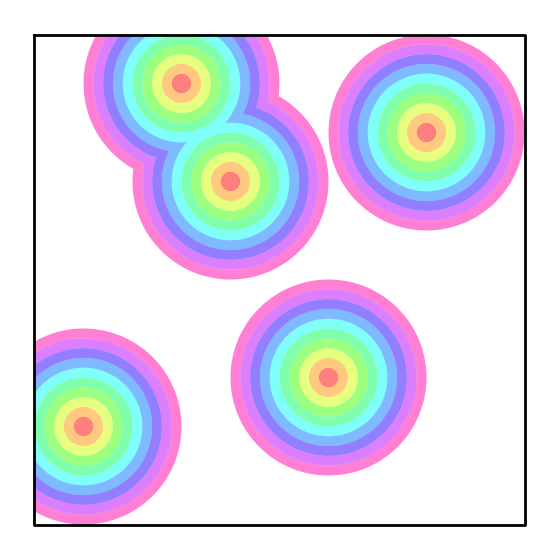

In [93]:
outer = Polygon([(0, 1), (1, 1), (1, 0), (0, 0)])

n = 10
# rings = get_circles(outer, inner1, n, do_plot=True)
# rings = get_circles(outer, inner2, n, do_plot=True)
rings = get_circles(outer, inner3, n, do_plot=True)

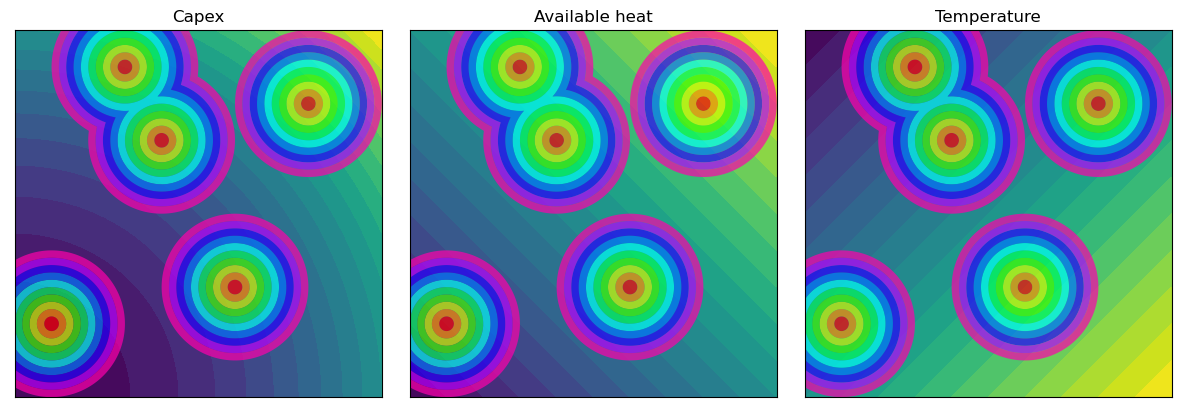

In [94]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

x, y = np.meshgrid(x, y)

capex = x**2 + y**2
available_heat = x + y
temperature = x - y

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for ax, data, title in zip(axs, [capex, available_heat, temperature], ['Capex', 'Available heat', 'Temperature']):

    # ax.imshow(data, cmap='viridis')
    ax.contourf(x, y, data, levels=20)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)

    for ring, c in zip(rings.values(), generate_color_list(n)):
        gpd.GeoSeries([ring]).plot(ax=ax, alpha=0.7, color=c)

plt.tight_layout()
plt.show()

In [95]:


mean_data = pd.DataFrame({'capex': capex.flatten(), 'temp': temperature.flatten()})
cumulative_data = pd.DataFrame({'heat': available_heat.flatten()})

totals = []

for distance, ring in rings.items():
    zeroth, first = get_region_value(x, y, ring, mean_data, cumulative_data)

    totals.append(pd.concat([zeroth, first], axis=0).rename(distance))

pd.concat(totals, axis=1)

,0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.20
capex,0.684152,0.659774,0.669991,0.671307,0.674128,0.684469,0.687402,0.686525,0.701657,0.696368
temp,-0.134409,-0.139995,-0.134208,-0.141296,-0.141728,-0.111031,-0.077316,-0.054341,-0.042284,-0.020446
heat,64.555556,187.333333,321.191919,436.232323,558.050505,650.686869,698.080808,760.949495,846.404040,905.747475
